# Big data na Pratica


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import time




In [3]:
#TODO ver formas de carregar um dataset
start_time = time.time()
temperaturas_df = pd.read_csv('../Datasets/GlobalLandTemperaturesByCity.csv')
temperaturas_df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
temperaturas_df.tail(50)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599162,2009-08-01,18.671,0.265,Zwolle,Netherlands,52.24N,5.26E
8599163,2009-09-01,15.288,0.199,Zwolle,Netherlands,52.24N,5.26E
8599164,2009-10-01,10.332,0.116,Zwolle,Netherlands,52.24N,5.26E
8599165,2009-11-01,9.040,0.289,Zwolle,Netherlands,52.24N,5.26E
8599166,2009-12-01,1.847,0.151,Zwolle,Netherlands,52.24N,5.26E
8599167,2010-01-01,-1.160,0.269,Zwolle,Netherlands,52.24N,5.26E
8599168,2010-02-01,1.182,0.202,Zwolle,Netherlands,52.24N,5.26E
8599169,2010-03-01,6.085,0.186,Zwolle,Netherlands,52.24N,5.26E
8599170,2010-04-01,9.164,0.082,Zwolle,Netherlands,52.24N,5.26E
8599171,2010-05-01,10.363,0.137,Zwolle,Netherlands,52.24N,5.26E


In [5]:
cidades_brasil_df = temperaturas_df[temperaturas_df['Country'] == 'Brazil']
cidades_brasil_df.describe().round()

,AverageTemperature,AverageTemperatureUncertainty
count,451645.0,451645.0
mean,22.0,1.0
std,3.0,1.0
min,10.0,0.0
25%,20.0,0.0
50%,22.0,1.0
75%,25.0,1.0
max,30.0,5.0


In [14]:


#tirar nulos
cidades_brasil_limpos_df = cidades_brasil_df.dropna(axis=0)
#Convertendo coluna para datetime a coluna dt
cidades_brasil_limpos_df["dt"] = pd.to_datetime(cidades_brasil_limpos_df["dt"])

cidades_brasil_limpos_df['Mes'] = cidades_brasil_limpos_df['dt'].dt.month
cidades_brasil_limpos_df['Ano'] = cidades_brasil_limpos_df['dt'].dt.year
del cidades_brasil_limpos_df["dt"]
cidades_brasil_limpos_df.head()
#len(cidades_brasil_df['City'].unique())

/tmp/ipykernel_35905/981665966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidades_brasil_limpos_df["dt"] = pd.to_datetime(cidades_brasil_limpos_df["dt"])
/tmp/ipykernel_35905/981665966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidades_brasil_limpos_df['Mes'] = cidades_brasil_limpos_df['dt'].dt.month
/tmp/ipykernel_35905/981665966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Mes,Ano
152741,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W,1,1832
152742,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W,2,1832
152743,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W,3,1832
152744,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W,4,1832
152745,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W,5,1832


In [15]:
#dataset por cidade escolhida
sao_vicente_df =  cidades_brasil_limpos_df[cidades_brasil_limpos_df['City'] == 'São Vicente']
guaratingueta_df =  cidades_brasil_limpos_df[cidades_brasil_limpos_df['City'] == 'Guaratinguetá']
marilia_df =  cidades_brasil_limpos_df[cidades_brasil_limpos_df['City'] == 'Marília']
sao_vicente_df["AverageTemperature"].describe().round(2)



count    2096.00
mean       19.70
std         2.51
min        13.54
25%        17.62
50%        19.76
75%        21.90
max        25.22
Name: AverageTemperature, dtype: float64

In [16]:
marilia_df["AverageTemperature"].describe().round(2)

count    2096.00
mean       22.59
std         2.25
min        16.33
25%        20.72
50%        23.08
75%        24.46
max        27.32
Name: AverageTemperature, dtype: float64

In [17]:
guaratingueta_df["AverageTemperature"].describe().round(2)

count    2096.00
mean       21.53
std         1.87
min        16.78
25%        20.03
50%        21.32
75%        23.04
max        26.45
Name: AverageTemperature, dtype: float64

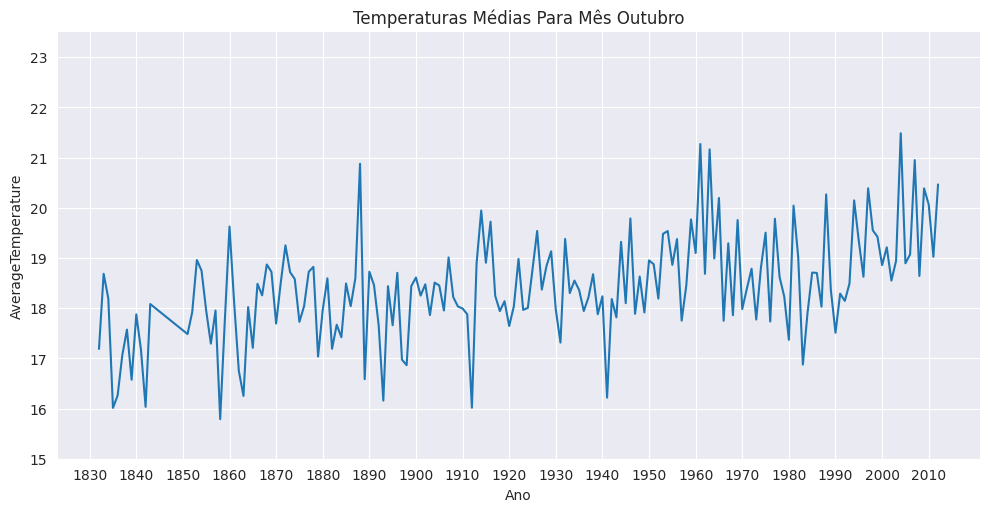

In [59]:
out_sv_df = sao_vicente_df[sao_vicente_df["Mes"] == 9]
scalax = np.arange(1830,2020,10)
sea.set_style('darkgrid')
g = sea.relplot(y=out_sv_df["AverageTemperature"],x=out_sv_df["Ano"],kind='line',aspect=2)
g.set(xticks=scalax)
plt.yscale('linear')
plt.ylim(15,23.5) 
plt.title("Temperaturas Médias Para Mês Outubro")

plt.show(g)

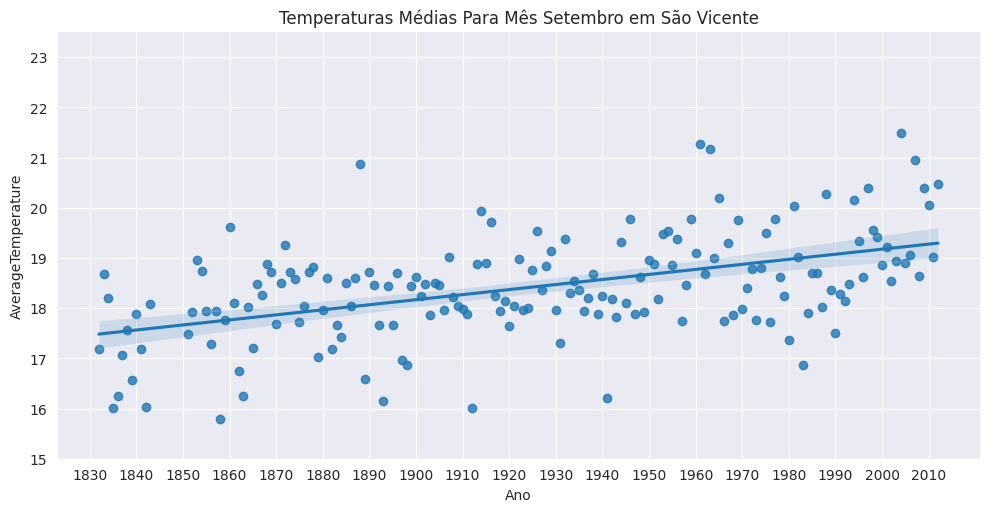

In [60]:

h = sea.lmplot(y='AverageTemperature', x='Ano', data=out_sv_df,aspect=2)
h.set(xticks=scalax)
plt.yscale('linear')
plt.ylim(15,23.5) 
plt.title("Temperaturas Médias Para Mês Setembro em São Vicente")
plt.show(h);
